## Marlon Tzorin - 20180072

### 1. Leer los archivos CSV proporcionados y almacenarlos en un np.array correspondiente para ser trabajado en el notebook.


In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import json

%matplotlib inline

In [3]:
ratings = pd.read_csv("ratings_small.csv")
links = pd.read_csv("links_small.csv")
movies = pd.read_csv("movies_metadata.csv")

In [4]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [7]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [5]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [8]:
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [6]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [9]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


link de referencia
https://towardsdatascience.com/cleaning-and-extracting-json-from-pandas-dataframes-f0c15f93cb38


In [10]:
movies['genres'] = movies['genres'].str.replace("\'","\"")
jgenres = ["genres"]

def new_json(x):
    return json.loads(x)

for x in jgenres:
    movies[x] = movies[x].apply(new_json)

    
def new_json2(x):

    ls = []

    for y in range(len(x[0])):

        for k, v in x[0][y].items():
            ls.append(str(k)+ "_" +str(v))
   
    for z in range(len(ls)):

        if ls[z] not in movies.columns:
            movies[ls[z]] = 0
            movies[ls[z]].iloc[x.name] = 1
        else:
            movies[ls[z]].iloc[x.name] = 1
    return

for x in jgenres:
    movies[[x]].apply(new_json2, axis=1)

In [11]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'id_16', 'name_Animation', 'id_35',
       'name_Comedy', 'id_10751', 'name_Family', 'id_12', 'name_Adventure',
       'id_14', 'name_Fantasy', 'id_10749', 'name_Romance', 'id_18',
       'name_Drama', 'id_28', 'name_Action', 'id_80', 'name_Crime', 'id_53',
       'name_Thriller', 'id_27', 'name_Horror', 'id_36', 'name_History',
       'id_878', 'name_Science Fiction', 'id_9648', 'name_Mystery', 'id_10752',
       'name_War', 'id_10769', 'name_Foreign', 'id_10402', 'name_Music',
       'id_99', 'name_Documentary', 'id_37', 'name_Western', 'id_10770',
       'name_TV Movie', 'name_Carousel Productions', 'id_11176'

In [12]:
# mismos dtpyes para operar
links['tmdbId'] = links['tmdbId'].astype(str)
links['tmdbId'] = links['tmdbId'].str.replace("\.0","")
links['tmdbId'] = links['tmdbId'].astype(object)
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602


In [14]:
# ID Join
movie_link = pd.merge(movies,links, left_on = 'id', right_on = 'tmdbId')
movie_link.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,id_17161,name_Pulser Productions,id_18012,name_Rogue State,id_18013,name_The Cartel,id_23822,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,1,114709,862
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,2,113497,8844
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0,0,0,0,0,0,0,3,113228,15602


In [16]:
# Ratings Join
ratings1 = ratings.drop('timestamp', axis = 1)
ratings1.head(3)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0


In [17]:
# 0 em vez de NA´s
movies_data = pd.merge(movie_link, ratings1, on = 'movieId')
movies_data = movies_data.fillna(0)
movies_data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,id_18012,name_Rogue State,id_18013,name_The Cartel,id_23822,movieId,imdbId,tmdbId,userId,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,1,114709,862,7,3.0
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,1,114709,862,9,4.0
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,1,114709,862,13,5.0


### Y

In [20]:
y0 = movies_data[['userId', 'movieId', 'rating']]
y = y0.pivot_table(index='movieId',columns='userId',values='rating', aggfunc=np.mean)
y.shape

(9025, 671)

### X

In [21]:
X0 = movies_data.filter(regex=("^name"))
X1 = pd.concat([movies_data['movieId'], X0], axis = 1)
X = X1.pivot_table(index='movieId',aggfunc='mean')
X.shape

(9025, 32)

In [24]:
# Numpy array
X2 = X.to_numpy()
y2 = np.nan_to_num(y.to_numpy())

X2 = X2.astype(float)
y2 = y2.astype(float)

## 2. Ajustar un modelo de regresión múltiple en base al juego de datos cargado que relacione cualquier subconjunto de carácterísticas.

### Train, Test, CV

In [30]:
X_tr, X_cros, X_t = np.split(X2, [int(len(X2)*0.7), int(len(X2)*0.85)])
y_tr, y_cros, y_t = np.split(y2, [int(len(y2)*0.7), int(len(y2)*0.85)])

In [31]:
m,n = X_train.shape
z,w = y_train.shape
theta_0 = np.random.rand(w,n)

## 3. Asegúrese de hacer los ajustes y trabajos necesarios al modelo que ha implementado para describir y predecir la información sobre la nube de datos. No olvide utilizar el algoritmo de contenido basado en recomendaciones y filtrado colaborativo, usando las características que considere necesarias.

In [32]:
def cost(Y, X, T):
    return(((X @ T.T - Y) ** 2) * ((Y != 0) * 1)).sum()


def gradient(Y, X, T):
    R = (Y != 0) * 1
    hip_error = (X @ T.T - Y) * R

    return (
        hip_error @ T,
        hip_error.T @ X,
    )


def adam(
        Y,
        Xo,
        To,
        fun,
        jac,
        alpha=0.001,
        beta1=0.9,
        beta2=0.999,
        epsilon=0.0000001,
        max_iter=1000
):
    xm = np.zeros(Xo.shape)
    tm = np.zeros(To.shape)

    xv = np.zeros(Xo.shape)
    tv = np.zeros(To.shape)

    X, T, t = Xo, To, 0

    cost = []
    while t < max_iter:
        t += 1

        xg, tg = jac(Y, X, T)

        cost.append(fun(Y, X, T).item())
        #print(f'{t} \t loss={fun(Y, X, T).item():,.2f}')

        xm = beta1 * xm + (1 - beta1) * xg
        tm = beta1 * tm + (1 - beta1) * tg

        xv = beta2 * xv + (1 - beta2) * xg * xg
        tv = beta2 * tv + (1 - beta2) * tg * tg

        xmh = xm / (1 - beta1 ** t)
        tmh = tm / (1 - beta1 ** t)

        xvh = xv / (1 - beta2 ** t)
        tvh = tv / (1 - beta2 ** t)

        X -= alpha * xmh / (np.sqrt(xvh) + epsilon)
        T -= alpha * tmh / (np.sqrt(tvh) + epsilon)

    return X, T, cost

## 4. Haga un análisis sobre sus hallazgos, donde mencione claramente las razones por las que considera que su modelo es bueno justificando adecuadamente

### Costo

In [33]:
X_tr2, Tetha_tr2, Ct = adam(y_tr, X_tr, theta_0, cost, gradient)

In [34]:
Ct[-1]

12602.495114250758

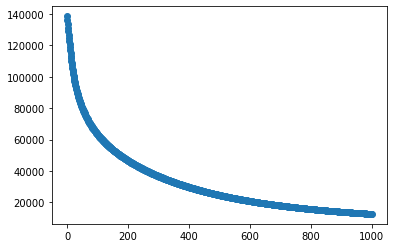

In [37]:
xrow = np.arange(0,len(Ct),1).reshape(-1,1)
plt.scatter(xrow, Ct)
plt.show()

### CV

In [38]:
Ccros = cost(y_cros, X_cros, Tetha_tr2)
Ccros

46715.35991427945

### Test

In [39]:
Cost_test = cost(y_t, X_t, Tetha_tr2)
Cost_test

26879.55241575179

Al tener un costo mayor en el CV se puede ver que el modelo no hace o no asegura una buena generalizacón. Sin embargo esto no significa que sea un mal modelo. En general el modelo a pesar de la generalizacion realiza un buena trabajo ajustandose a los datos.